In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
df_train_x = pd.read_csv("data/splitted/Fraud_Detection_train_features.csv")
df_train_y = pd.read_csv("data/splitted/Fraud_Detection_train_target.csv")
df_val_x = pd.read_csv("data/splitted/Fraud_Detection_validation_features.csv")
df_val_y = pd.read_csv("data/splitted/Fraud_Detection_validation_target.csv")
df_test_x = pd.read_csv("data/splitted/Fraud_Detection_test_features.csv")
df_test_y = pd.read_csv("data/splitted/Fraud_Detection_test_target.csv")

#shape가 일치하는지 확인
print(df_train_x.shape)
print(df_train_y.shape)
print(df_val_x.shape)
print(df_val_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(28014, 18)
(28014, 1)
(9338, 18)
(9338, 1)
(9339, 18)
(9339, 1)


In [32]:
df_train_x.head(8)

,TRANS_YEAR,IS_COVID_YEAR,TRANS_MONTH,TRANS_DAY,TRANS_DAY_SIMPLIFIED,TRANS_HOUR,TRANS_HOUR_SIMPLIFIED,CATEGORY,AMT,GENDER,CITY,CITY_POP,STATE,JOB,AGE,CC_NUM,log_AMT,BC_CITY_POP
0,2019,False,1,10,0,23,3,1,344.01,False,Fulton,355,45,Financial adviser,68,3513618443244549,5.840671,4.329507
1,2019,False,1,29,2,20,3,11,8.20,False,Meredith,61,38,Public relations account executive,83,4430881574719618,2.104134,3.309117
2,2020,True,10,7,0,15,2,9,76.14,True,Oak Hill,277,27,Glass blower/designer,51,38797410705641,4.332574,4.197414
3,2019,False,9,1,0,23,3,6,1002.17,True,Sacramento,757530,11,Magazine features editor,44,4890424426862856940,6.909923,7.052526
4,2019,False,6,5,0,22,3,8,107.33,False,Lawn,213,5,Special educational needs teacher,51,4169759661243568,4.675908,4.053561
5,2019,False,10,14,1,18,2,12,5.37,True,Rock Tavern,2258,27,Building surveyor,86,4988304376504,1.680828,5.208969
6,2020,True,7,7,0,17,2,6,7.52,False,Clayton,1760,14,Occupational psychologist,51,4450831335606294,2.017566,5.100664
7,2019,False,12,24,2,8,1,1,117.17,True,Princeton,1426,8,Agricultural consultant,66,4423489490781412,4.763626,5.006857


In [33]:
df_train_y.head(8)

,IS_FRAUD
0,True
1,False
2,False
3,True
4,True
5,False
6,False
7,False


train 데이터셋을 이리저리 뜯어보고 만져보고 시각화하며 train 데이터셋의 인사이트, 패턴을 발견한다.

-> 모든 2개의 feature의 조합으로 Fraud데이터와 not fraud데이터의 분포상태를 파악하고, 패턴이 있는 조합을 추려낸다.

-> 그리고 패턴 중에서 더 선명한 패턴을 보이는 조합을 더 비중있게 다룬다.

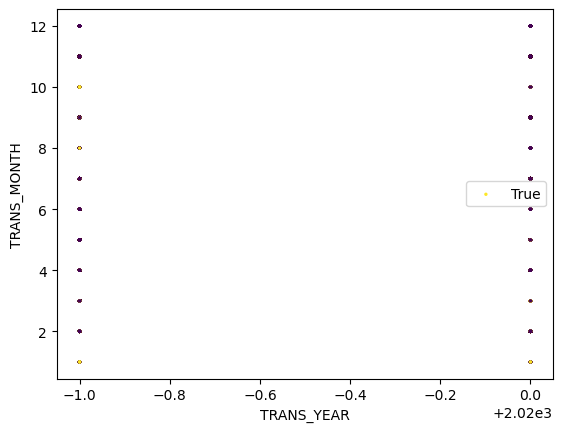

In [34]:
x_feature = "TRANS_YEAR"
y_feature = "TRANS_MONTH"

plt.scatter(x = df_train_x[x_feature], y = df_train_x[y_feature], c = df_train_y["IS_FRAUD"], s = 2)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(df_train_y["IS_FRAUD"])
plt.show()

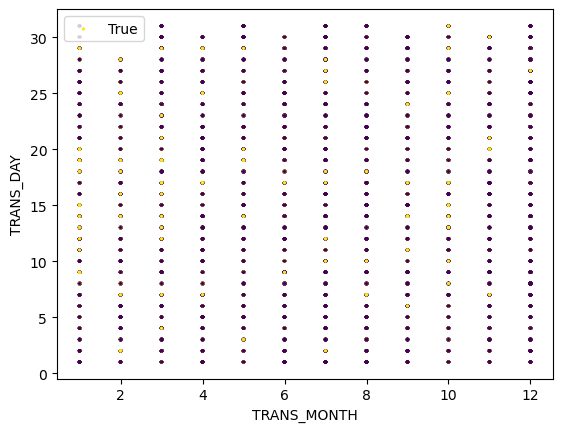

In [35]:
x_feature = "TRANS_MONTH"
y_feature = "TRANS_DAY"

plt.scatter(x = df_train_x[x_feature], y = df_train_x[y_feature], c = df_train_y["IS_FRAUD"], s = 2)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(df_train_y["IS_FRAUD"])
plt.show()

변수의 갯수가 적은 경우에는 시각화보다 표 또는 PLOT그래프로 정리하는게 더 좋음.

독립변수가 AMT, CITY_POP조합을 제외하면 전부 표나 PLOT그래프로 정리해 놓는게 유리하다

## 시각화 먼저 진행

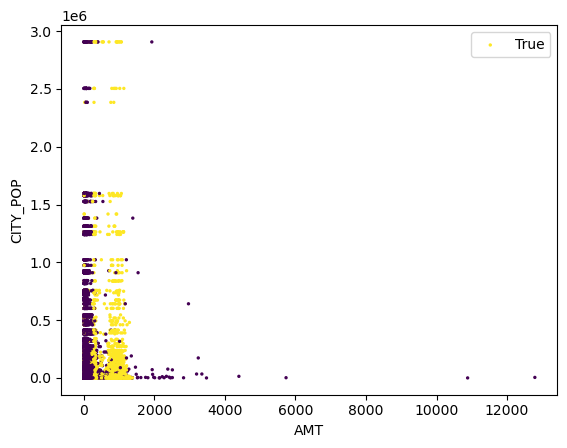

In [36]:
x_feature = "AMT"
y_feature = "CITY_POP"

plt.scatter(x = df_train_x[x_feature], y = df_train_x[y_feature], c = df_train_y["IS_FRAUD"], s = 2)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(df_train_y["IS_FRAUD"])
plt.show()

변수의 갯수가 많아서 시각화 하기에 적절하지만 이상치 제거가 필요함

## 여기서 train feature테이블과 target테이블을 concat함

In [37]:
df_train = pd.concat([df_train_x, df_train_y],axis = 1)

In [38]:
# df_train = df_train[(df_train["CITY_POP"] < 1200000) & (df_train["AMT"] < 2000)]

# print(df_train.isnull().sum())

# print(df_train.shape)

# x_feature = "AMT"
# y_feature = "CITY_POP"

# plt.scatter(x = df_train[x_feature], y = df_train[y_feature], c = df_train["IS_FRAUD"], s = 2)
# plt.xlabel(x_feature)
# plt.ylabel(y_feature)
# plt.legend(df_train_y["IS_FRAUD"])
# plt.show()

In [39]:
# df_train.head(88)

## 인덱스 87번이 빠져 있음을 기억해 두자(이상치 제거 안하면 안 빠져 있음)

FRAUD가 CITY_POP과는 전혀 연관이 없어 보인다. (CITY_POP이 무엇이든 간에 AMT에 대한 FRAUD의 분포는 거의 동일함)
# 결론1: CITY_POP은 모델에서 빼자

##### 이제 PLOT그래프를 그려볼 차례이다.
##### AMT는 값의 종류가 매우 많기 때문에 일정한 범위로 묶어서 PLOT그래프를 그려야 한다

# 주의!
## 한 column에서 가질 수 있는 각각의 값의 갯수가 서로 다르기 때문에, FRAUD가 아니라 FRAUD_RATIO를 사용해야 한다.

In [40]:
#The ratio of FRAUD about AMT

amt_group = pd.DataFrame(columns = ["FRAUD", "NOT_FRAUD", "FRAUD_RATIO"], index = ["0~250", "251~500", "501~750", "751~1000", "1001~1250", "1251~"])

amt_group = amt_group.fillna(0)

amt_group

,FRAUD,NOT_FRAUD,FRAUD_RATIO
0~250,0,0,0
251~500,0,0,0
501~750,0,0,0
751~1000,0,0,0
1001~1250,0,0,0
1251~,0,0,0


In [41]:
for i in range(df_train.shape[0]):
    try:
        if((df_train.loc[i, "AMT"] >= 0) and (df_train.loc[i, "AMT"] <= 250)):
            if(df_train.loc[i,"IS_FRAUD"] == True):
                amt_group.loc["0~250", "FRAUD"] = amt_group.loc["0~250", "FRAUD"] + 1
            else:
                amt_group.loc["0~250", "NOT_FRAUD"] = amt_group.loc["0~250", "NOT_FRAUD"] + 1
        if((df_train.loc[i, "AMT"] >= 251) and (df_train.loc[i, "AMT"] <= 500)):
            if(df_train.loc[i,"IS_FRAUD"] == True):
                amt_group.loc["251~500", "FRAUD"] = amt_group.loc["251~500", "FRAUD"] + 1
            else:
                amt_group.loc["251~500", "NOT_FRAUD"] = amt_group.loc["251~500", "NOT_FRAUD"] + 1
        if((df_train.loc[i, "AMT"] >= 501) and (df_train.loc[i, "AMT"] <= 750)):
            if(df_train.loc[i,"IS_FRAUD"] == True):
                amt_group.loc["501~750", "FRAUD"] = amt_group.loc["501~750", "FRAUD"] + 1
            else:
                amt_group.loc["501~750", "NOT_FRAUD"] = amt_group.loc["501~750", "NOT_FRAUD"] + 1
        if((df_train.loc[i, "AMT"] >= 751) and (df_train.loc[i, "AMT"] <= 1000)):
            if(df_train.loc[i,"IS_FRAUD"] == True):
                amt_group.loc["751~1000", "FRAUD"] = amt_group.loc["751~1000", "FRAUD"] + 1
            else:
                amt_group.loc["751~1000", "NOT_FRAUD"] = amt_group.loc["751~1000", "NOT_FRAUD"] + 1
        if((df_train.loc[i, "AMT"] >= 1001) and (df_train.loc[i, "AMT"] <= 1250)):
            if(df_train.loc[i,"IS_FRAUD"] == True):
                amt_group.loc["1001~1250", "FRAUD"] = amt_group.loc["1001~1250", "FRAUD"] + 1
            else:
                amt_group.loc["1001~1250", "NOT_FRAUD"] = amt_group.loc["1001~1250", "NOT_FRAUD"] + 1
        else:
            if(df_train.loc[i,"IS_FRAUD"] == True):
                amt_group.loc["1251~", "FRAUD"] = amt_group.loc["1251~", "FRAUD"] + 1
            else:
                amt_group.loc["1251~", "NOT_FRAUD"] = amt_group.loc["1251~", "NOT_FRAUD"] + 1
    except:
        pass
            
print(amt_group)

           FRAUD  NOT_FRAUD  FRAUD_RATIO
0~250       1462      21713            0
251~500     1499        313            0
501~750      407         99            0
751~1000    1669         36            0
1001~1250    715         20            0
1251~       5076      22203            0


### 이상치를 제거했기 때문에 index가 중간중간 빠져있다. 따라서 try-except문을 추가해서 pass하도록 함

In [42]:
amt_group["FRAUD_RATIO"] = amt_group["FRAUD"]/(amt_group["NOT_FRAUD"] + amt_group["FRAUD"])

amt_group

,FRAUD,NOT_FRAUD,FRAUD_RATIO
0~250,1462,21713,0.063085
251~500,1499,313,0.827263
501~750,407,99,0.804348
751~1000,1669,36,0.978886
1001~1250,715,20,0.972789
1251~,5076,22203,0.186077


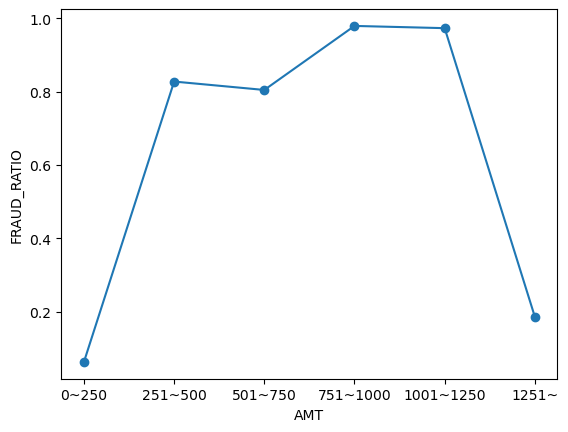

In [43]:
plt.plot(["0~250", "251~500", "501~750", "751~1000", "1001~1250", "1251~"], amt_group["FRAUD_RATIO"])
plt.scatter(["0~250", "251~500", "501~750", "751~1000", "1001~1250", "1251~"], amt_group["FRAUD_RATIO"])
plt.xlabel("AMT")
plt.ylabel("FRAUD_RATIO")
plt.show()

# 결론2: AMT는 M자 모양의 모델을 선정한다.

In [44]:
type(df_train["CITY_POP"].unique())

numpy.ndarray

### 나머지 features에 대하여 FRAUD_RATIO를 구하는 함수를 정의한다.
#### PARAMETER: 첫 번째 열은 FRAUD_RATIO를 구하고 싶은 feature가, 두 번재 열은 IS_FRAUD 열이다.

In [45]:
def find_fraud_ratio(df):
    obj_column_name = list(df.columns)
    obj_column_name = obj_column_name[0]
    
    print(obj_column_name)
    
    idx_list = list(df[obj_column_name].unique())
    
    df_result = pd.DataFrame(columns = ["INDEX", "FRAUD", "NOT_FRAUD", "FRAUD_RATIO"], index = idx_list)
    df_result = df_result.fillna(0)
    df_result["INDEX"] = idx_list
    

    for i in range(df.shape[0]):
        try:
            if(df.loc[i, "IS_FRAUD"] == True):
                df_result.loc[(df.loc[i, obj_column_name]), "FRAUD"] += 1
            else:
                df_result.loc[(df.loc[i, obj_column_name]), "NOT_FRAUD"] += 1
        except:
            pass
            
    df_result["FRAUD_RATIO"] = df_result["FRAUD"] / (df_result["FRAUD"] + df_result["NOT_FRAUD"])
    
    df_result = df_result[["INDEX", "FRAUD_RATIO"]]
    
    df_result = df_result.sort_values("INDEX")
    
    df_result = df_result.rename(columns={"INDEX":obj_column_name})
    
    return df_result

리턴값은 1열이 한 feature가 가지는 값의 종류이고, 2열이 FRAUD_RATIO이다.

In [46]:
print(df_train.columns)

Index(['TRANS_YEAR', 'IS_COVID_YEAR', 'TRANS_MONTH', 'TRANS_DAY',
       'TRANS_DAY_SIMPLIFIED', 'TRANS_HOUR', 'TRANS_HOUR_SIMPLIFIED',
       'CATEGORY', 'AMT', 'GENDER', 'CITY', 'CITY_POP', 'STATE', 'JOB', 'AGE',
       'CC_NUM', 'log_AMT', 'BC_CITY_POP', 'IS_FRAUD'],
      dtype='object')


TRANS_YEAR


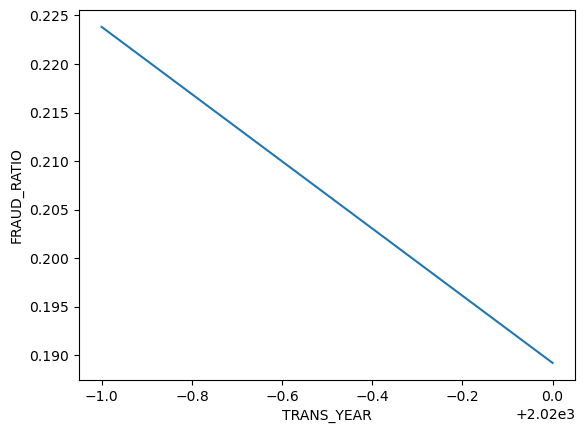

In [47]:
df_trans_year = find_fraud_ratio(df_train[["TRANS_YEAR", "IS_FRAUD"]])

plt.plot(df_trans_year["TRANS_YEAR"], df_trans_year["FRAUD_RATIO"])
plt.xlabel("TRANS_YEAR")
plt.ylabel("FRAUD_RATIO")
plt.show()

# 결론3: TRANS_YEAR은 종류가 2개 뿐이기 때문에 의미가 없다(제외!)

TRANS_MONTH
    TRANS_MONTH  FRAUD_RATIO
1             1     0.289580
2             2     0.296677
3             3     0.241637
4             4     0.198643
5             5     0.239966
6             6     0.204309
7             7     0.151622
8             8     0.188395
9             9     0.213542
10           10     0.235798
11           11     0.192271
12           12     0.131018


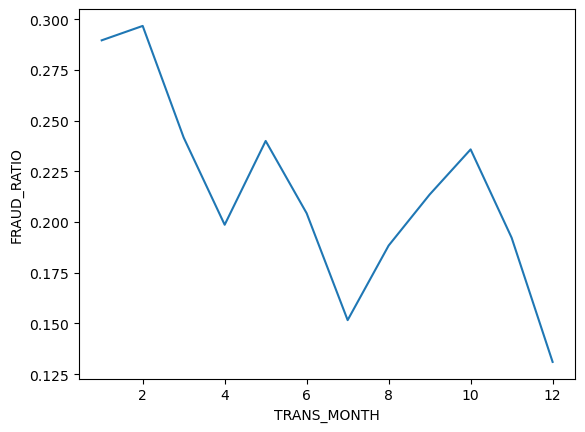

In [48]:
df_trans_month = find_fraud_ratio(df_train[["TRANS_MONTH", "IS_FRAUD"]])

print(df_trans_month)

plt.plot(df_trans_month["TRANS_MONTH"], df_trans_month["FRAUD_RATIO"])
plt.xlabel("TRANS_MONTH")
plt.ylabel("FRAUD_RATIO")
plt.show()

# 결론4: TRANS_MONTH는 4차함수 모양의 모델을 선정한다.

TRANS_DAY_SIMPLIFIED
   TRANS_DAY_SIMPLIFIED  FRAUD_RATIO
0                     0     0.200644
1                     1     0.222760
2                     2     0.196971


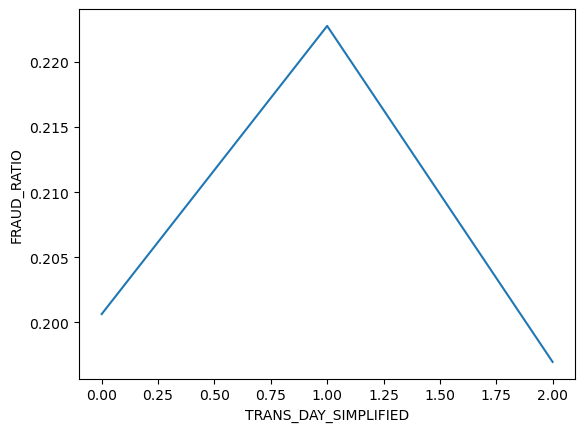

In [49]:
df_trans_day_simplified = find_fraud_ratio(df_train[["TRANS_DAY_SIMPLIFIED", "IS_FRAUD"]])

print(df_trans_day_simplified)

plt.plot(df_trans_day_simplified["TRANS_DAY_SIMPLIFIED"], df_trans_day_simplified["FRAUD_RATIO"])
plt.xlabel("TRANS_DAY_SIMPLIFIED")
plt.ylabel("FRAUD_RATIO")
plt.show()

TRANS_HOUR_SIMPLIFIED
   TRANS_HOUR_SIMPLIFIED  FRAUD_RATIO
0                      0     0.289292
1                      1     0.047362
2                      2     0.048666
3                      3     0.355783


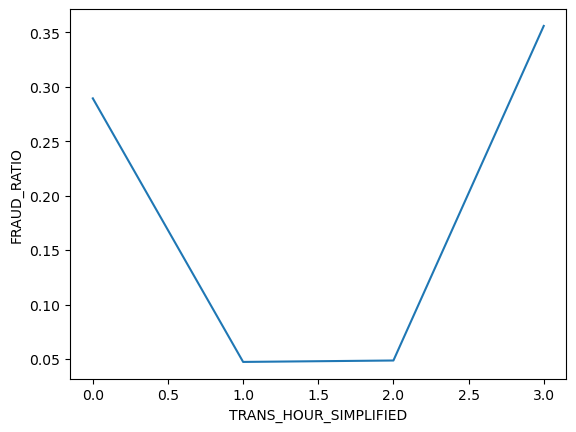

In [50]:
df_trans_hour_simplified = find_fraud_ratio(df_train[["TRANS_HOUR_SIMPLIFIED", "IS_FRAUD"]])

print(df_trans_hour_simplified)

plt.plot(df_trans_hour_simplified["TRANS_HOUR_SIMPLIFIED"], df_trans_hour_simplified["FRAUD_RATIO"])
plt.xlabel("TRANS_HOUR_SIMPLIFIED")
plt.ylabel("FRAUD_RATIO")
plt.show()

CATEGORY
    CATEGORY  FRAUD_RATIO
0          0     0.395509
1          1     0.393966
2          2     0.099188
3          3     0.162384
4          4     0.122436
5          5     0.121795
6          6     0.447090
7          7     0.244929
8          8     0.075188
9          9     0.097877
10        10     0.069139
11        11     0.108835
12        12     0.090244
13        13     0.064125


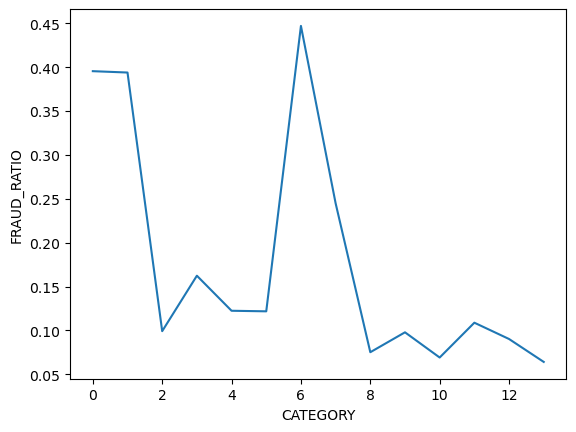

In [51]:
df_trans_category = find_fraud_ratio(df_train[["CATEGORY", "IS_FRAUD"]])

print(df_trans_category)

plt.plot(df_trans_category["CATEGORY"], df_trans_category["FRAUD_RATIO"])
plt.xlabel("CATEGORY")
plt.ylabel("FRAUD_RATIO")
plt.show()

In [ ]:
df_trans_state = find_fraud_ratio(df_train[["STATE", "IS_FRAUD"]])

print(df_trans_state)

plt.plot(df_trans_state["STATE"], df_trans_state["FRAUD_RATIO"])
plt.xlabel("STATE")
plt.ylabel("FRAUD_RATIO")
plt.show()

STATE


## 일단 TRANS_DAY를 넣어서 정렬테스트를 진행

In [ ]:
df_train = pd.concat([df_train_x, df_train_y], axis = 1)
df_train.head()

df_train = df_train.sort_values(by=["CC_NUM", "TRANS_DAY"] ,ascending=True)

df_train.head(20)

### 날짜를 2019년 1월 1일을 0DAY라고 간주하고 며칠이 지났는지 표시하는 DAY컬럼을 추가한다.

In [ ]:
list1 = []
for i in range(df_train.shape[0]):
    list1.append(0)

df_train["DAY"] = list1

df_train.head()

In [ ]:
df_train = df_train.reindex(list(range(df_train.shape[0])))

df_train.head()

In [ ]:
import datetime as dt

for i in range(df_train.shape[0]):
    dt1 = dt.datetime(2019, 1, 1)
    dt2 = dt.datetime(df_train.loc[i, "TRANS_YEAR"], df_train.loc[i, "TRANS_MONTH"], df_train.loc[i, "TRANS_DAY"])
    if(dt1 == dt2):
        td = 0
        df_train.loc[i, "DAY"] = td
    else:
        td = dt2 - dt1
        df_train.loc[i, "DAY"] = td
        list_temp = (str(df_train.loc[i, "DAY"]).split(" day"))
#         print(list_temp)
#         print(type(list_temp[0]))
        df_train.loc[i, "DAY"] = list_temp[0]

df_train["DAY"] = df_train["DAY"].astype(int)

df_train.head()
df_train.info()

In [ ]:
df_train.head()

df_train = df_train.sort_values(by=["CC_NUM", "DAY"] ,ascending=True)

df_train.head(50)

df_train.to_csv("data/ordered_by_ccnum_and_day.csv")

### CC_NUM을 기준으로 동일한 CC_NUM에 대하여 날짜가 오름차순으로 정렬되었다!